In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.display import HTML

In [3]:
tdados = 1000
X = 1-2*np.random.rand(tdados,2)
y = [int(d[0]**2+d[1]**2<0.5) for d in X]
scl = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scl.fit_transform(X)

In [4]:
original = pd.read_csv("dados.csv")
le = preprocessing.LabelEncoder()

modificado = pd.DataFrame()
for x in original:
    if original[x].dtypes==object:
        modificado[x] = le.fit_transform(np.array(original[x]))
    else:
        modificado[x] = np.array(original[x])


y = modificado.COMPARECEU_AGENDAMENTO_EXAME
X = modificado.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1)

Xd,y = np.array(X), 1-np.array(y)
X = (Xd-Xd.min(axis=0))/(Xd.max(axis=0)-Xd.min(axis=0))

In [106]:
nomes = [
    "Nearest Neighbors",
    "SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classificadores = [
    KNeighborsClassifier(3),
    NuSVC(gamma="auto",nu=0.12,probability=True),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

corte = 0.07
nint = 50
res = {}
for nm in nomes:
    res[nm] = []
    
for i in range(nint):
    X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.25)
    print(i)
    for nome, clf in zip(nomes, classificadores):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        predicted = clf.predict_proba(X_test)
        xx = confusion_matrix(y_test,(predicted[:,1] >= corte).astype(bool),normalize='true')
        # print(xx[0][0],xx[1][1])
        res[nome].append(xx[0][0]+xx[1][1])

        # print(str(i)+" - "+nome+" - "+ "{:.4f}".format(score))

tbl = pd.DataFrame.from_dict(res)
tbl.describe()

0


KeyboardInterrupt: 

<AxesSubplot: >

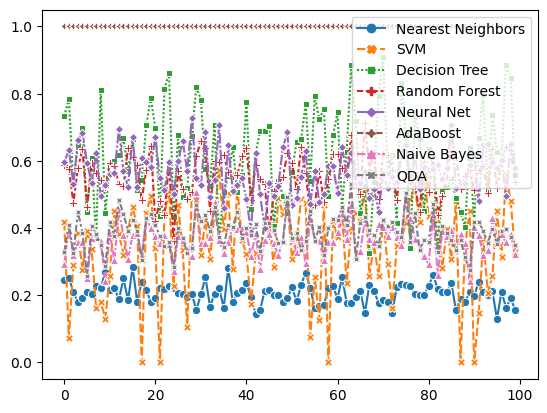

In [23]:
sns.lineplot(data = res,markers=True)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.25)
esc = 2
adb = classificadores[esc]
adb.fit(X_train, y_train)

y_pred_tr = adb.predict_proba(X_train)
scrs = np.linspace(0.0,.10,1000)
xx = []
yy = []
for vl in scrs:
    mtx = confusion_matrix(y_train,(y_pred_tr[:,1] >= vl).astype(bool),normalize='true')
    xx.append(mtx[0][0])
    yy.append(mtx[1][1])
plt.plot(scrs,xx,scrs,yy)

vlf = scrs[np.argmin((np.array(xx)-np.array(yy))**2)]
y_pred = adb.predict_proba(X_test)
mtx = confusion_matrix(y_test,(y_pred[:,1] >= vlf).astype(bool),normalize='true')
print(nomes[esc],mtx)

KeyboardInterrupt: 